# SHAP-Style Plots  Documentation

This notebook is designed to demonstrate how to use `pymint` to plot [SHAP-style](https://github.com/slundberg/shap) plots within MintPy. For more information on dataset and initializing `InterpretToolkit`, see the permutatation importance notebook.

In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.append(path)
import numpy as np
import xarray as xr
import pandas as pd
import shap

In [2]:
import pymint
from pymint.common.utils import shap_values_to_importance, coefficients_to_importance
import plotting_config 

### Loading the training data and pre-fit models 


In [3]:
estimators = pymint.load_models()
X,y = pymint.load_data()

In [4]:
X_subset = shap.sample(X, 10, random_state=22)
explainer = pymint.InterpretToolkit(estimators[0], X=X_subset,)

### Compute the Shap Values 

In [5]:
background_dataset = shap.sample(X, 100)
results = explainer.shap(background_dataset=background_dataset)

trying TreeExplainer...


## Summary Plot

Once we compute the SHAP values for a large number of examples, we can evaluate different patterns. For example, in the plot below, SHAP values are ranked by their absolute sum. Additionally, the SHAP values are color-coded by their normalized magnitude where red indicates a higher predictor value while blue indicates a lower predictor value. In this case, surface temperature ($T_{sfc}$) had the largest absolute sum and lower values increases the probability of freezing road surface temperatures. 



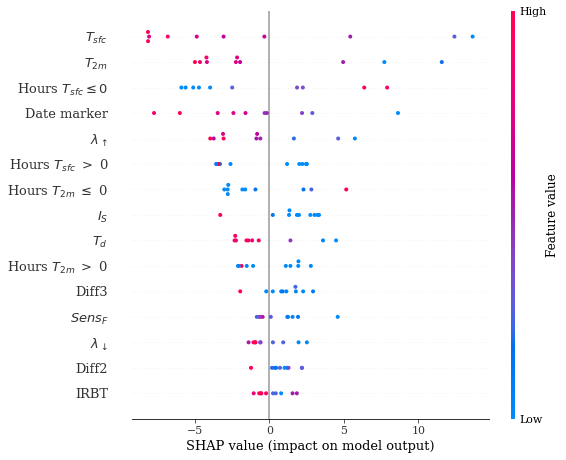

In [6]:
shap_values, bias = results['Random Forest']
explainer.plot_shap(
                    plot_type = 'summary',
                    shap_values=shap_values,
                    display_feature_names=plotting_config.display_feature_names,
)                           

Instead of this plot, we can evaluate the SHAP-based ranking with the bar-style plot used in PyMint. 

(<Figure size 900x750 with 1 Axes>, [<AxesSubplot:xlabel='Random Forest'>])

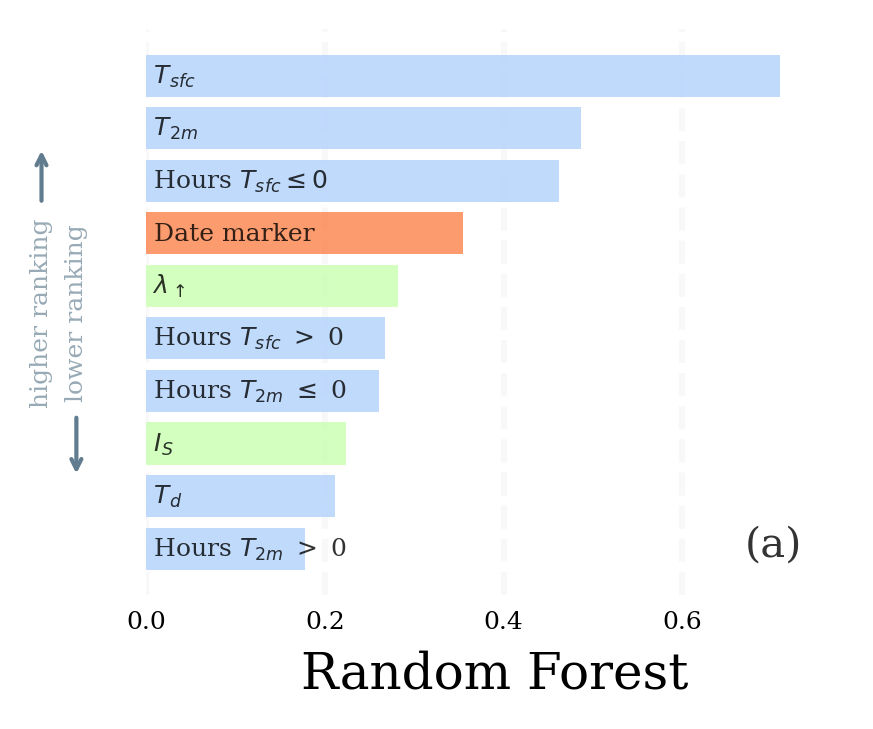

In [7]:
data = shap_values_to_importance(shap_values, estimator_name='Random Forest', feature_names=X.columns)
explainer.plot_importance(data=data, 
                          estimator_names = 'Random Forest', 
                          display_feature_names=plotting_config.display_feature_names,
                          feature_colors=plotting_config.color_dict,
                          method='shap')

### Dependence Plot

SHAP values can also be displayed similar to ALE/PD curve where the values are presented as a function of the predictor value. For this plots, we can also include `histdata`, which is a combination of `X` and `y`. For classification problems, the user can provide the name of the target variable and the background histogram will be color-coded for the different classes. Lastly, each dot is color coded by the value of the feature that approximately interacts with the feature being plotted. 


In [8]:
X.columns

Index(['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud', 'lat_hf',
       'low_cloud', 'mid_cloud', 'sat_irbt', 'sens_hf', 'sfcT_hrs_ab_frez',
       'sfcT_hrs_bl_frez', 'sfc_rough', 'sfc_temp', 'swave_flux', 'temp2m',
       'tmp2m_hrs_ab_frez', 'tmp2m_hrs_bl_frez', 'tot_cloud', 'uplwav_flux',
       'vbd_flux', 'vdd_flux', 'wind10m', 'date_marker', 'urban', 'rural',
       'd_ground', 'd_rad_d', 'd_rad_u', 'hrrr_dT'],
      dtype='object')

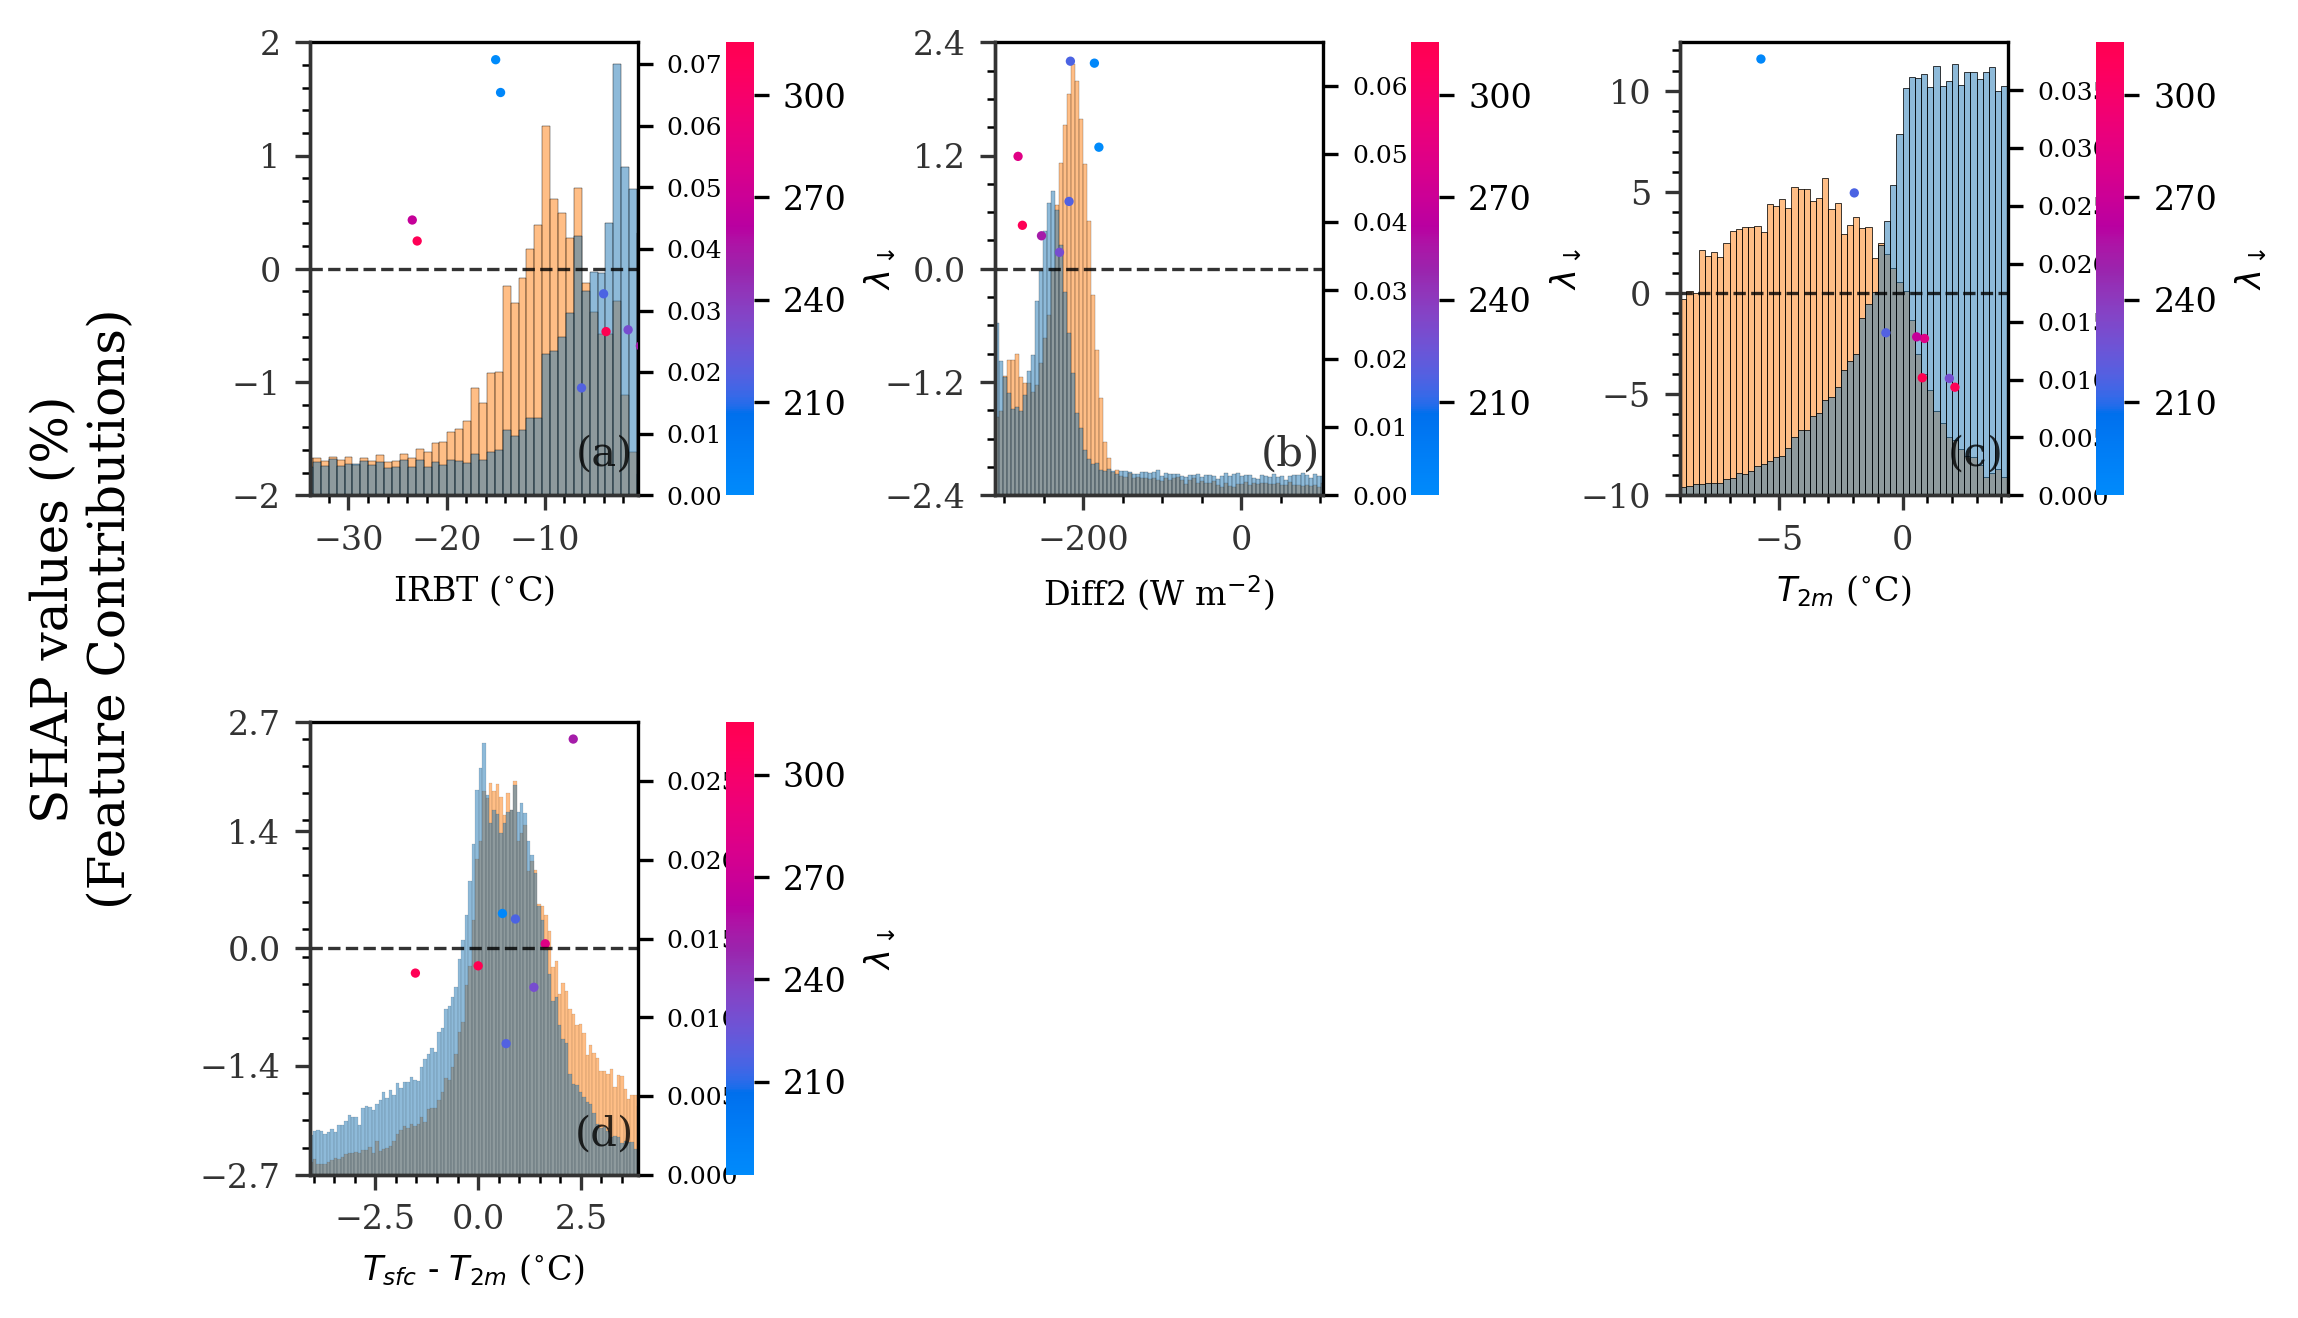

In [9]:
features = ['sat_irbt', 'd_rad_d', 'temp2m', 'hrrr_dT']

histdata=X.copy()
histdata['target'] = y

explainer.plot_shap(features=features,
                    plot_type = 'dependence',
                    shap_values=shap_values,
                    display_feature_names=plotting_config.display_feature_names,
                    display_units = plotting_config.display_units,
                    histdata=histdata,
                    target='target',
                    interaction_index='auto'
)

## No color-coding of dots 

Set `interaction_index=None` to remove the color-coding. 

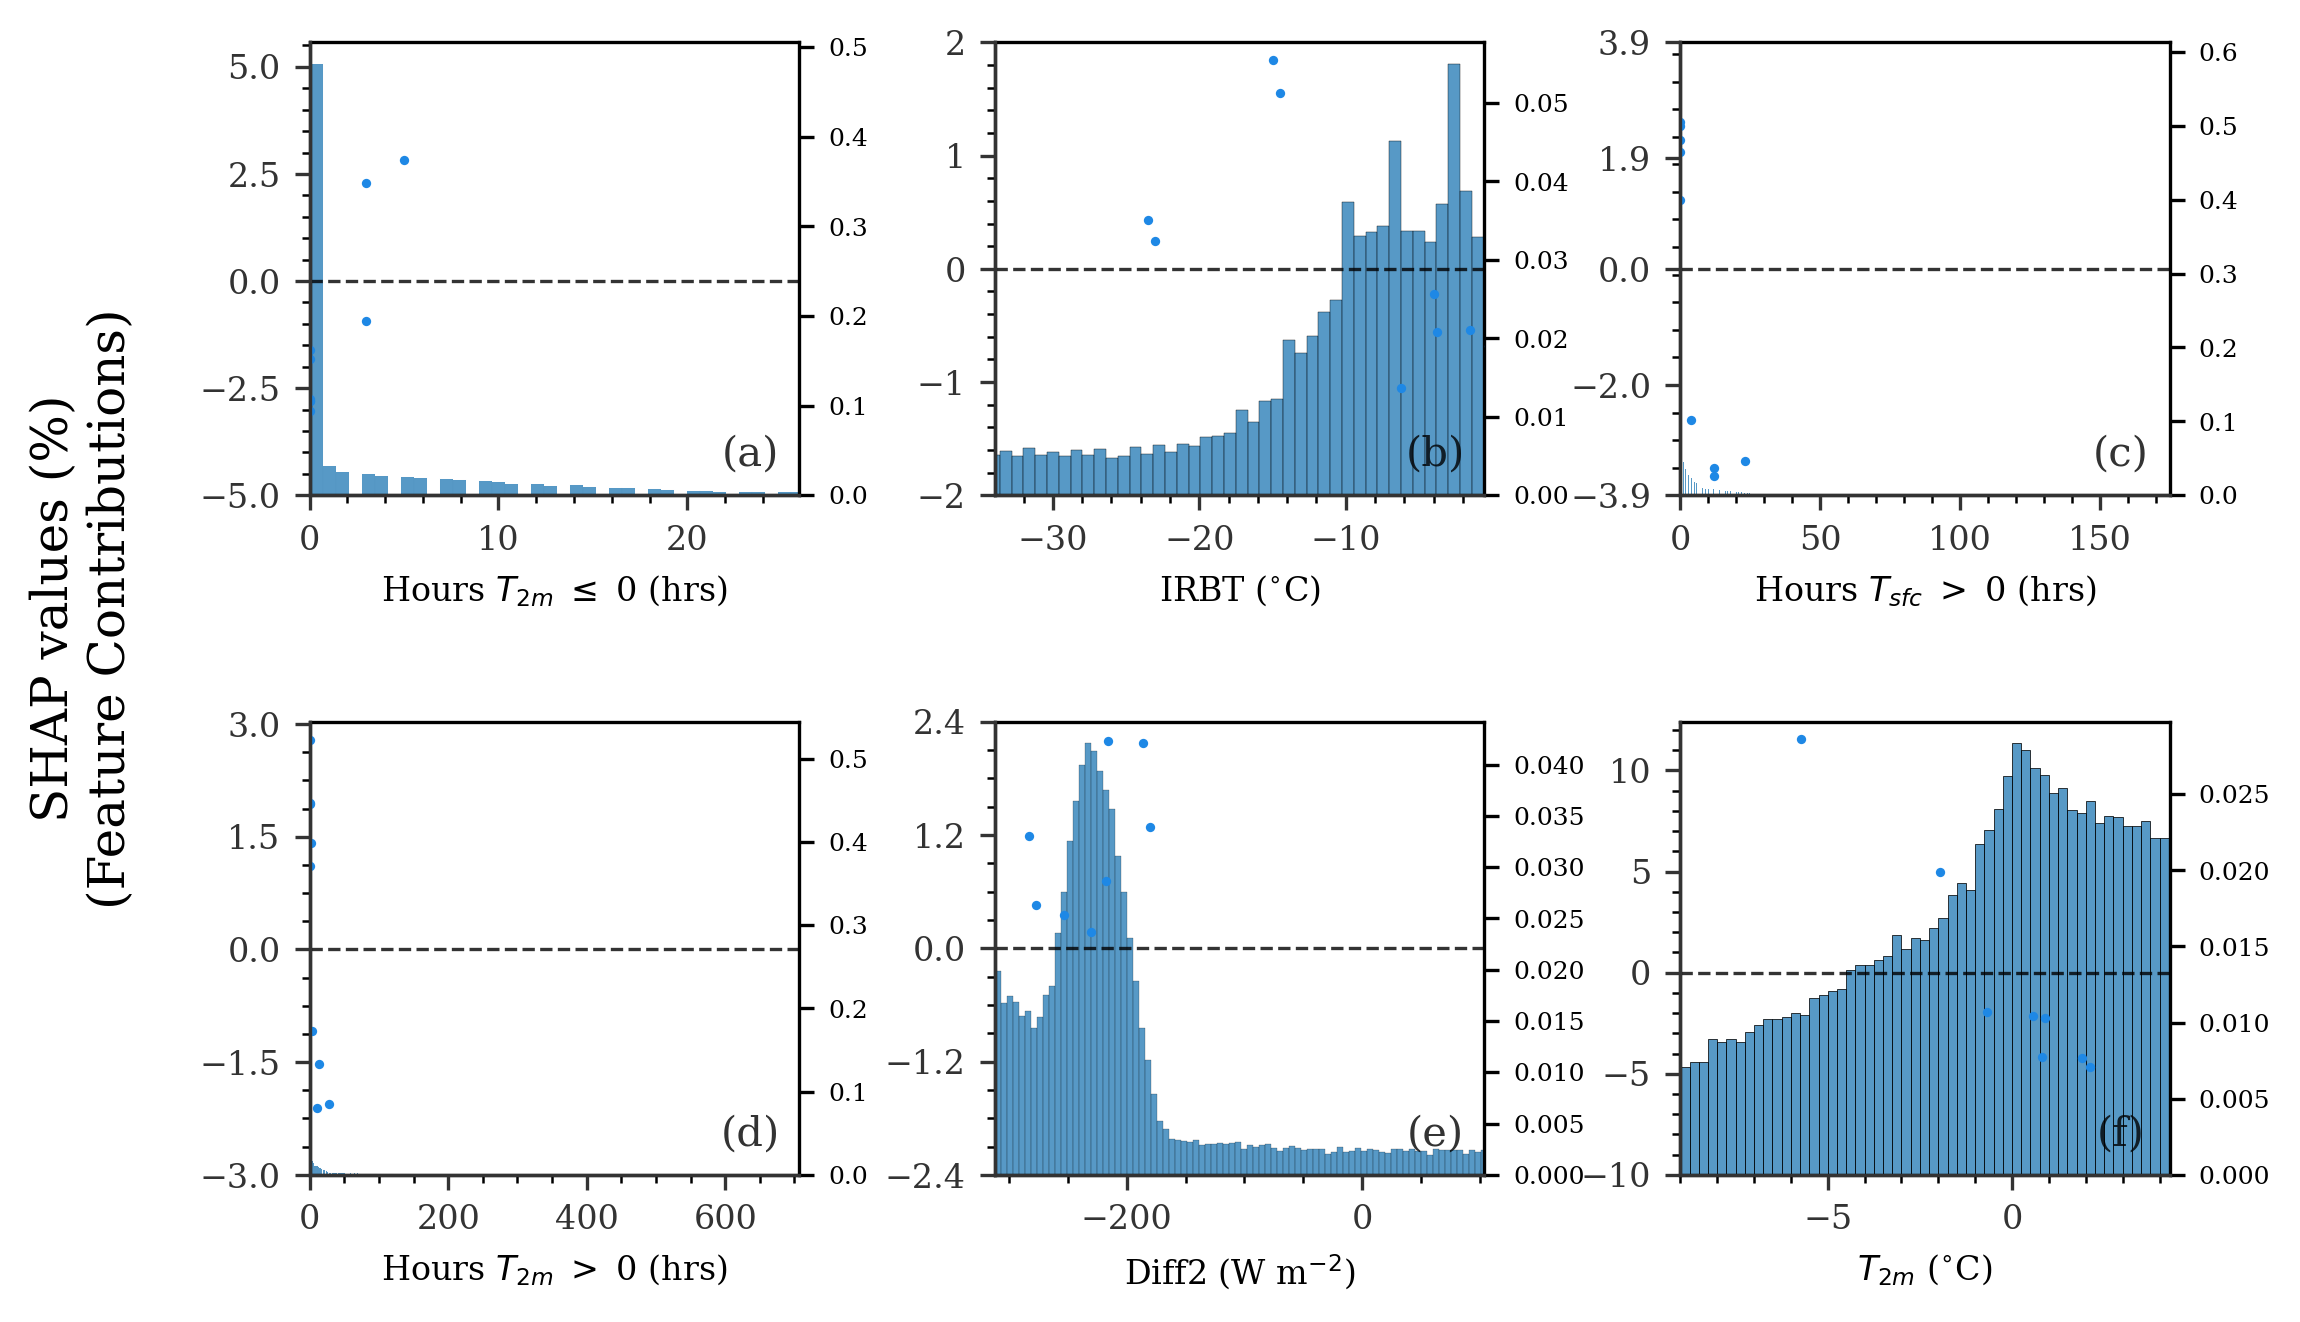

In [10]:
features = ['tmp2m_hrs_bl_frez', 'sat_irbt', 'sfcT_hrs_ab_frez', 'tmp2m_hrs_ab_frez', 'd_rad_d', 'temp2m']

explainer.plot_shap(features=features,
                    plot_type = 'dependence',
                    shap_values=shap_values,
                    display_feature_names=plotting_config.display_feature_names,
                    display_units = plotting_config.display_units,
                    histdata=histdata,
                    interaction_index=None,
)

## SHAP for Regression

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

In [12]:
data = fetch_california_housing()
X = data['data']
y = data['target']
feature_names = data['feature_names']
model= RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor()

In [13]:
X_subset = shap.sample(X, 100, random_state=42)
explainer = pymint.InterpretToolkit(('Random Forest', model),X=X_subset, feature_names=feature_names)

trying TreeExplainer...


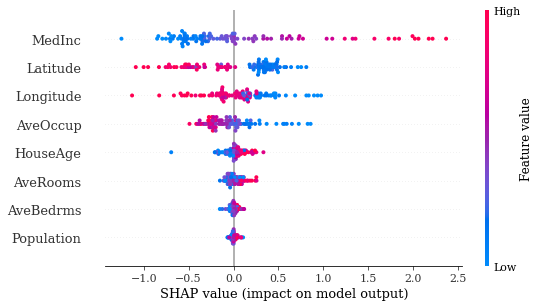

In [14]:
background_dataset = shap.sample(X, 100)
results = explainer.shap(background_dataset=background_dataset)
shap_values, bias = results['Random Forest']
explainer.plot_shap(
                    plot_type = 'summary',
                    shap_values=shap_values,
                    display_feature_names=plotting_config.display_feature_names,
)                           